In [1]:
from import_library import *
# import pandas as pd

# Data Ingestion

In [2]:
file = 'Cafe_Data.xlsx'
data = pd.read_excel(file)
data['date'] = pd.to_datetime(data['date'],format ='%d/%m/%y %H:%M:%S')
data

,date,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE
1,2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.00,23.75,0.00,123.75,BEVERAGE
2,2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.00,9.50,0.00,49.50,BEVERAGE
3,2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE
4,2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.00,10.69,0.00,55.69,BEVERAGE
...,...,...,...,...,...,...,...,...,...
145825,2010-05-22 21:43:55,N0028716,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR
145826,2010-04-27 20:52:11,N0028343,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR
145827,2010-05-28 01:03:37,N0028835,ZINZI WHITE (GLS),3,150.00,117.00,0.00,567.00,LIQUOR
145828,2010-04-30 23:44:37,N0028399,ZINZI WHITE (GLS),1,150.00,39.00,0.00,189.00,LIQUOR


# Function

In [34]:
# Pie Chart
# Function for Data Visualization
def PieChart(data, title_chart,labels=None,legendTitile=None,colors=None ):
    """
    Plot pie chart
    ----------
    Parameters (Attributes)    
    data : string
        relative path for the images files
    title_chart : string
        the title of the chart
    labels : list, default: None
        labels of the chart
    legendTitile: list ,default: None
        legends of the chart
    ------
    Returns:    
    The plot
    ------
    Example:
    apr_2010_sum = apr_2010['Total'].sum()
    pieChartTitle = f'The Percentage of Categories in The April Sale ({apr_2010_sum}) 2010'
    legendTitile = 'Categories'
    colors = ['orange', 'green', 'red', 'pink', 'brown']
    PieChart(percentage_cate_value,pieChartTitle,labels=category_list,legendTitile=legendTitile)
    """
    def my_autopct1(x):
        '''
        invisible for partions less than 5%
        return (f'{x:.1f}% ({np.sum(data)*x/100:.0f})') if x > 5 else ''#\n
        '''    
        return (f'{x:.1f}% \n ({np.sum(data)*x/100:.0f})') if x > 5 else '' #\n

    plt.figure(figsize=(5,5))
    plt.pie(data, 
            autopct=my_autopct1, 
           # colors=colors
           )    
    plt.title(title_chart)
    plt.legend(labels,title= legendTitile,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
    return 

# Data Analysis

In [3]:
data.dtypes

date            datetime64[ns]
Bill Number             object
Item Desc               object
Quantity                 int64
Rate                   float64
Tax                    float64
Discount               float64
Total                  float64
Category                object
dtype: object

In [4]:
data.isnull().sum()

date            0
Bill Number     0
Item Desc       0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [5]:
data['Quantity'].value_counts()

Quantity
1     132355
2      11015
3       1596
4        512
5        159
6         93
7         27
9         24
8         22
10         9
13         4
11         4
12         3
30         1
18         1
14         1
23         1
16         1
26         1
15         1
Name: count, dtype: int64

In [6]:
data['Category'].value_counts()

Category
FOOD                57023
BEVERAGE            43573
TOBACCO             36496
LIQUOR               6200
MISC                 1187
WINES                 809
MERCHANDISE           487
LIQUOR & TOBACCO       54
LIQUOR                  1
Name: count, dtype: int64

# Feature Engineering

In [7]:
data['year'] = data['date'].dt.strftime('%Y')
data['month'] = data['date'].dt.strftime('%m')
data['day'] = data['date'].dt.strftime('%d')
data

,date,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category,year,month,day
0,2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE,2010,04,01
1,2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.00,23.75,0.00,123.75,BEVERAGE,2010,04,01
2,2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.00,9.50,0.00,49.50,BEVERAGE,2010,04,01
3,2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE,2010,04,01
4,2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.00,10.69,0.00,55.69,BEVERAGE,2010,04,01
...,...,...,...,...,...,...,...,...,...,...,...,...
145825,2010-05-22 21:43:55,N0028716,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR,2010,05,22
145826,2010-04-27 20:52:11,N0028343,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR,2010,04,27
145827,2010-05-28 01:03:37,N0028835,ZINZI WHITE (GLS),3,150.00,117.00,0.00,567.00,LIQUOR,2010,05,28
145828,2010-04-30 23:44:37,N0028399,ZINZI WHITE (GLS),1,150.00,39.00,0.00,189.00,LIQUOR,2010,04,30


In [8]:
data[data['year']=='2010'].value_counts()

date                 Bill Number   Item Desc                             Quantity  Rate    Tax     Discount  Total    Category     year  month  day
2010-08-25 20:54:27  G0494990      GREAT LAKES T-SHIRTS                  1         332.00  16.60   0.00      348.60   MERCHANDISE  2010  08     25     4
2010-04-17 17:15:39  G0472765      PHILLYCREAM CHEESE &CHILLY PAN        1         105.00  24.94   0.00      129.94   FOOD         2010  04     17     3
2010-11-28 21:58:49  G0511347      COTTAGE CHEESE PANINI                 1         105.00  24.94   0.00      129.94   FOOD         2010  11     28     3
2010-05-01 19:09:12  G0475040      B.M.T. PANINI                         1         105.00  24.94   0.00      129.94   FOOD         2010  05     01     3
2010-04-03 21:12:56  G0470591      B.M.T. PANINI                         1         105.00  24.94   0.00      129.94   FOOD         2010  04     03     3
                                                                                       

# Data Aggregation

In [9]:
year_group = data.groupby('year')
year_2010 = year_group.get_group('2010') #4->12
month_2010_group = year_2010.groupby('month')

In [10]:
year_2010['Total'].sum()

24054138.14

## April 2010

In [11]:
apr_2010 = month_2010_group.get_group('04')

In [35]:
category_list = apr_2010['Category'].unique().tolist()
apr_2010_cat_group = apr_2010.groupby('Category')
cat_varibles = []
for cat in category_list:
    cat_varibles.append(apr_2010_cat_group.get_group(cat))
percentage_cate_value = []
# Calculate Percentage
for idx in range(len(category_list)):
    percentage_cate_value.append(cat_varibles[idx]['Total'].sum())

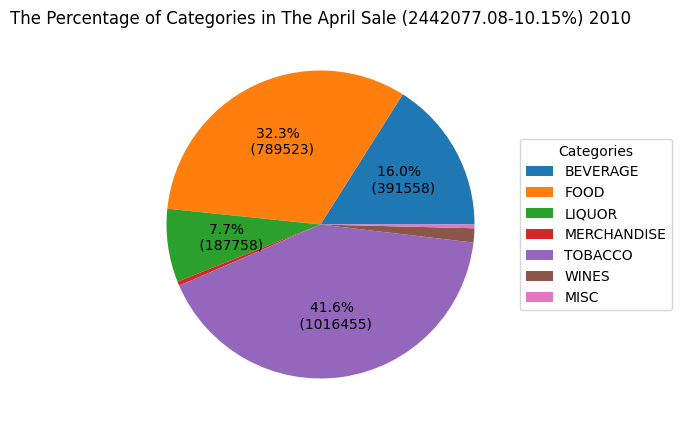

In [39]:
apr_2010_sum = apr_2010['Total'].sum()
proportion_income_out_of_year = apr_2010['Total'].sum()*100 / year_2010['Total'].sum()
pieChartTitle = f'The Percentage of Categories in The April Sale ({apr_2010_sum}-{proportion_income_out_of_year:.2f}%) 2010'
legendTitile = 'Categories'
# colors = ['orange', 'green', 'red', 'pink', 'brown']
PieChart(percentage_cate_value,pieChartTitle,labels=category_list,legendTitile=legendTitile)

In [32]:
# Export the most selling product in April 2010 - # Need the threshold (Confirm from customers)
item_lists = apr_2010['Item Desc'].unique().tolist()
apr_2010_item_group = apr_2010.groupby('Item Desc')
total_item_values = []
categories = []
for item in item_lists:
    total_item_values.append(apr_2010_item_group.get_group(item)['Total'].sum())
    categories.append(apr_2010_item_group.get_group(item)['Category'].unique()[0])
data_dict = {
    'items' : item_lists,
    'total_sale': total_item_values,
    'Categories': categories,
}
df = pd.DataFrame(data_dict)
df.sort_values(by=['total_sale'],ascending=False, inplace=True)
df 
# df.to_csv('4-2010.csv')

,items,total_sale,Categories
82,SAMBUCA,182490.00,TOBACCO
79,NIRVANA HOOKAH SINGLE,176899.80,TOBACCO
78,MINT FLAVOUR SINGLE,164241.00,TOBACCO
83,N R G HOOKAH,133650.00,TOBACCO
84,CALCUTTA MINT,78540.00,TOBACCO
...,...,...,...
187,COOLER GLASS(PILSNER),78.75,MERCHANDISE
132,MUGS - PLAIN COLOUR,75.38,MERCHANDISE
291,OATMEAL AND RAISIN COOKIES,68.06,FOOD
120,TREE DIARY,65.10,MERCHANDISE
